<a href="https://colab.research.google.com/github/chiragmittal15/Python/blob/master/parkinson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
#Import Libraries 
import numpy as np
import matplotlib.pyplot as plt  
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import scipy
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn import svm
from sklearn import tree
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
sns.set()

In [115]:
url="/content/pd_speech_features.csv"
data_set=pd.read_csv(url)
x= data_set.iloc[:,1:-1].values  
y= data_set.iloc[:,754].values  


**Describe the data_set**


In [116]:
print(data_set.describe()) # stats of data_set
# sns.heatmap(data_set.corr()) #heat map of all the features

               id      gender  ...  tqwt_kurtosisValue_dec_36       class
count  756.000000  756.000000  ...                 756.000000  756.000000
mean   125.500000    0.515873  ...                  31.481110    0.746032
std     72.793721    0.500079  ...                  34.230991    0.435568
min      0.000000    0.000000  ...                   2.364000    0.000000
25%     62.750000    0.000000  ...                   3.948750    0.000000
50%    125.500000    1.000000  ...                  10.637250    1.000000
75%    188.250000    1.000000  ...                  61.125325    1.000000
max    251.000000    1.000000  ...                 156.423700    1.000000

[8 rows x 755 columns]


**Plotting the data**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


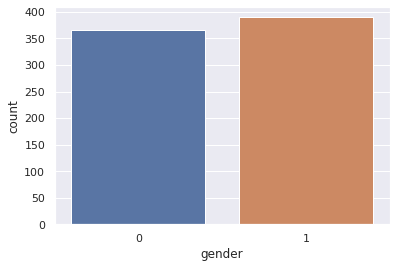

In [117]:
sns.countplot(data_set['gender']) # 1:Male 2:Female   ## gender plot

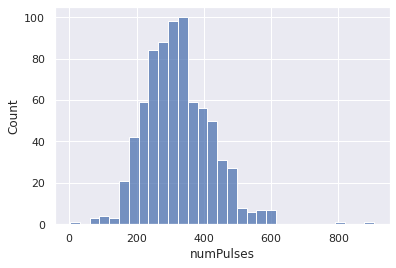

In [118]:
sns.histplot(data_set['numPulses'])

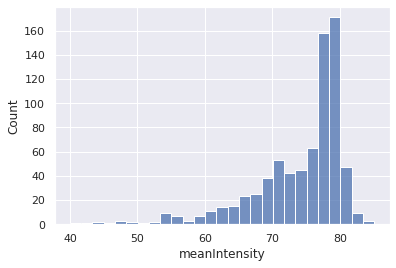

In [119]:
sns.histplot(data_set['meanIntensity'])

Scaling the data between **0-1**




In [120]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(x)
print(scaled)

[[1.         0.93627823 0.56531022 ... 0.01261106 0.01878989 0.1075979 ]
 [1.         0.83743386 0.48945462 ... 0.07752521 0.07892294 0.27790525]
 [1.         0.9343847  0.42873779 ... 0.01759397 0.02147211 0.01559525]
 ...
 [0.         0.97255542 0.58177525 ... 0.02786571 0.02515993 0.01738547]
 [0.         0.9193635  0.66442389 ... 0.01360698 0.01578207 0.00875699]
 [0.         0.89075278 0.71556576 ... 0.03574493 0.01197732 0.00511944]]


Handling missing value by calculating the **mean**

In [121]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer=imputer.fit(x[:,:])
x[:,:]=imputer.transform(x[:,:])
print(x)

[[ 1.       0.85247  0.71826 ...  2.6202   3.0004  18.9405 ]
 [ 1.       0.76686  0.69481 ...  6.5245   6.3431  45.178  ]
 [ 1.       0.85083  0.67604 ...  2.9199   3.1495   4.7666 ]
 ...
 [ 0.       0.88389  0.72335 ...  3.5377   3.3545   5.0424 ]
 [ 0.       0.83782  0.7489  ...  2.6801   2.8332   3.7131 ]
 [ 0.       0.81304  0.76471 ...  4.0116   2.6217   3.1527 ]]


***K NeighborsClassifier***

In [122]:
classifier= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train)  
y_pred= classifier.predict(x_test)  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

[[ 17  28]
 [ 18 126]]


In [123]:
accuracy_score(y_test, y_pred)  ## accuracy 

0.7566137566137566

***Random Forest Algo***

In [124]:
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(x_train, y_train)
y_pred= clf.predict(x_test) 
cm= confusion_matrix(y_test, y_pred)  
print(cm)

[[ 23  22]
 [  4 140]]


In [125]:
accuracy_score(y_test, y_pred)*100  ## accuracy 

86.24338624338624

***SVM***

In [126]:
clf = svm.SVC()
clf.fit(x_train, y_train)
y_pred= clf.predict(x_test)  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

[[  7  38]
 [  5 139]]


In [127]:
accuracy_score(y_test, y_pred)  ## accuracy 

0.7724867724867724

***Decision Tree***

In [128]:
clf = tree.DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pred= clf.predict(x_test)  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

[[ 28  17]
 [ 21 123]]


In [129]:
accuracy_score(y_test, y_pred)  ## accuracy 

0.798941798941799

***Naive Bayes***

In [130]:
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test)
cm= confusion_matrix(y_test, y_pred)  
print(cm)

[[  8  37]
 [ 10 134]]


In [131]:
accuracy_score(y_test, y_pred)  ## accuracy 

0.7513227513227513

***Stochastic Gradient Descent***

In [132]:
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=50)
clf.fit(x_train, y_train)
y_pred= clf.predict(x_test)  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

[[18 27]
 [96 48]]


In [133]:
accuracy_score(y_test, y_pred)  ## accuracy 

0.3492063492063492

***XGBOOST***

In [135]:
model=XGBClassifier(eval_metric='mlogloss')

model.fit(x_train,y_train)
y_pred=model.predict(x_test)

print(accuracy_score(y_test, y_pred)*100)
cm= confusion_matrix(y_test, y_pred)  
print(cm)

85.71428571428571
[[ 26  19]
 [  8 136]]
